In [1]:
# imports
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [2]:
# reading data to dataframe
data = pd.read_excel('Exam_Scores.xlsx')
data
score = data[['Exam1','Exam3']]

In [3]:
score['Exam1'] = zscore(score['Exam1'])
score['Exam3'] = zscore(score['Exam3'])
score

C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Exam1,Exam3
0,1.679507,1.178986
1,-0.924672,0.263269
2,-1.122816,-1.201879
3,-1.688942,-1.705523
4,-0.132096,0.400626
5,0.943543,1.041628
6,1.368138,1.499487
7,-0.556690,-1.018735
8,-0.018871,0.125911
9,0.066048,-1.201879


In [4]:
# finding the mean of x and y
mean_x = np.mean(score['Exam1'])
mean_y = np.mean(score['Exam3'])
#mean_vec = np.array([[mean_x],[mean_y]])
print(mean_y)

4.625929269271485e-18


In [5]:
# caculate the covariance matrix
cov_mat = np.cov([score['Exam1'],score['Exam3']])
print(cov_mat)

[[1.09090909 0.86244769]
 [0.86244769 1.09090909]]


In [6]:
# find the the eigenvalues and eigenvectors using numpy
e_val, e_vec = np.linalg.eig(cov_mat)
print('Value')
print(e_val)
print('')
print('Vector')
print(e_vec)

Value
[1.95335678 0.2284614 ]

Vector
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [7]:
# sorting the eigenvalue
eig_pairs = [(np.abs(e_val[i]), e_vec[:,i]) for i in range(len(e_val))]
eig_pairs.sort(key=lambda x:x[0],reverse=True)
for i in eig_pairs:
    print(i[0])

1.9533567815138928
0.22846140030428896


In [8]:
# finding the covariance of the eigenpairs
matrix = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print('Matrix:\n', matrix)

Matrix:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [9]:
# Put scores into a matrix and rehape to mutiply by eigenpairs to find PCA
score_mat = score.as_matrix().reshape(2,12)

transformed = matrix.T.dot(score_mat)
assert transformed.shape == (2,12)
# print the transformed matrix
print(transformed)
a1 = transformed[0]
b1 =  transformed[1]
c1 = [a1,b1]


[[ 2.1550101   1.89396607 -1.04748169 -0.53419556 -0.80729481 -0.76082398
  -1.14755956 -2.05584351  0.55376421  0.46944458  0.29356175  0.9874524 ]
 [-0.22017131  0.22662842  0.26020246 -0.90651368  0.78060738  0.93888916
   1.24096557  0.35613037  0.74057623 -0.09712647 -1.04080983 -0.48563233]]


C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
# sum squared distance and variation of PCA1
from sklearn.metrics.pairwise import euclidean_distances
var1 = euclidean_distances(c1)/(len(a1)-1)
print(var1)

[[0.         0.51030469]
 [0.51030469 0.        ]]


In [12]:
# from the slides we find PCA2 by mutiplying the -0.41*E1 and 0.89*E2
#a[0].dot(transformed[0])
a = np.array(-0.41*transformed[0])
b = np.array(0.89*transformed[1])

In [13]:
# sum squared distance and variation of PCA2
a.reshape(-1,1)
b.reshape(-1,1)
c = [a,b]
var2 = euclidean_distances(c)/(len(a)-1)
print(var2)

[[0.         0.20435512]
 [0.20435512 0.        ]]


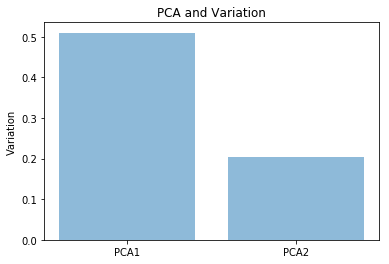

In [16]:
# making screeplot using the variation
import matplotlib.pyplot as plt
objects = ('PCA1','PCA2')
pos = np.arange(len(objects))
ver = [0.51,0.204]

plt.bar(pos, ver, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Variation')
plt.title('PCA and Variation')

plt.show()

In [17]:
# Below is the PCA implement using only scipy and numpy

In [18]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(score.T)

In [19]:
# find the PCA1 and PCA2 using sklearn
from sklearn.decomposition import PCA
pca1 = PCA(1).fit(score)
# printing the percentage of variance for PCA1
print('Percentage Explained: ', pca1.explained_variance_ratio_*100)

Percentage Explained:  [89.52885249]


In [20]:
pca2 = PCA(2).fit(score)
#printing the perccentage variance for PCA2
print('Percentage Explained: ',pca2.explained_variance_ratio_*100)

Percentage Explained:  [89.52885249 10.47114751]


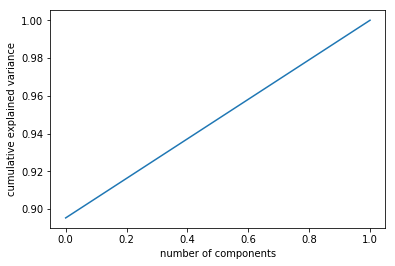

In [21]:
# printing the screeplot
import matplotlib.pyplot as plt
pca = PCA().fit(score)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()